<a href="https://colab.research.google.com/github/PoojaSwamii/Capstone_Project-EDA-on-Hotel-Booking-/blob/main/Capstone_Project_Hotel_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Hotel Booking Analysis 

# Problem Statement 

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

# Let's Go...

# 1. Understanding Data 

**Import Libraries** 

In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime 
import seaborn as sns 
import ast


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


**DataSet Loading** 

In [3]:
hotel_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/module/Hotel Bookings.csv')

In [4]:
#Frst View of data (columns)
print(hotel_df.index)
print('\n')
print(hotel_df.columns)

RangeIndex(start=0, stop=119390, step=1)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,9.0,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [27]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


**Duplicates values** 

In [8]:
#Removing duplicate values using drop_duplicate
hotel_df.drop_duplicates(inplace=True)

In [9]:
hotel_df.reset_index() #view unique data 

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**Missing and null values** 

In [10]:
hotel_df.fillna(np.nan, inplace = True)

In [12]:
#checking missing values 
miss_value = hotel_df.isnull().sum().sort_values(ascending = False)
miss_value

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


# 2. Understanding your variables

In [28]:
#Dataset Columns
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Vairable Description 
The columns and the data it represents are listed below:

1. hotel : Name of the hotel (Resort Hotel or City Hotel)

2. is_canceled : If the booking was canceled (1) or not (0)

3. lead_time: Number of days before the actual arrival of the guests

4. arrival_date_year : Year of arrival date

5. arrival_date_month : Month of month arrival date

6. arrival_date_week_number : Week number of year for arrival date

7. arrival_date_day_of_month : Day of arrival date

8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. adults : Number of adults among guests

11. children : Number of children among guests

12. babies : Number of babies among guests

13. meal : Type of meal booked

14. country : Country of guests

15. market_segment : Designation of market segment

16. distribution_channel : Name of booking distribution channel

17. is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20. reserved_room_type : Code of room type reserved

21. assigned_room_type : Code of room type assigned

22. booking_changes : Number of changes/amendments made to the booking

23. deposit_type : Type of the deposit made by the guest

24. agent : ID of travel agent who made the booking

25. company : ID of the company that made the booking

26. days_in_waiting_list : Number of days the booking was in the waiting list

27. customer_type : Type of customer, assuming one of four categories

28. adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. required_car_parking_spaces : Number of car parking spaces required by the customer

30. total_of_special_requests : Number of special requests made by the customer

31. reservation_status : Reservation status (Canceled, Check-Out or No-Show)

32. reservation_status_date : Date at which the last reservation status was updated

# 3. Data Wrangling 




# Data Cleanup 

As we saw , company columns consist of 82137 null values so it is better to drop that column

In [16]:
#droppinh the company column
hotel_df.drop(['company'] , axis=1 , inplace = True)

As you can see , Agent columns contain 12193 null values so we will replace nan with value o using fillna

In [20]:
hotel_df['agent'].fillna(value = 0 , inplace = True)
hotel_df['agent'].isnull().sum()

0

Doing the same process with Country and children columns

In [22]:
#filling null values in country column
hotel_df['country'].fillna(value= 'other' , inplace = True)
hotel_df['country'].isnull().sum()

0

In [23]:
#filling null value in children column
hotel_df['children'].fillna(value=0 , inplace=True)
hotel_df['children'].isnull().sum()

0

# Change in datatype for required columns

In [24]:
#getting info of columns
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [29]:
# change the data type of agent and children from float to int 
hotel_df[['children','agent']]= hotel_df[['children','agent']].astype('int64')

# Creating New Columns


In [31]:
#total stay in night 
hotel_df['total_stay_at_night'] = hotel_df['stays_in_week_nights']+hotel_df['stays_in_weekend_nights']
hotel_df['total_stay_at_night']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay_at_night, Length: 87396, dtype: int64

In [32]:
#we have created a cloumn for revenue using total stay*adr 
hotel_df['revenue'] = hotel_df['total_stay_at_night']*hotel_df['adr']
hotel_df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87396, dtype: float64

In [33]:
#creating new column : total_guest 
hotel_df['total_guest'] = hotel_df['babies']+hotel_df['children']+hotel_df['adults']

In [ ]:
hotel_df.head(1)

For understanding , from column 'is_canceled' : we will replace the value from (0,1) to not_canceled , is_canceled 

In [37]:
hotel_df['is_canceled'] = hotel_df['is_canceled'].replace([0,1],['not_canceled','is_canceled'])
hotel_df['is_canceled']

0         not_canceled
1         not_canceled
2         not_canceled
3         not_canceled
4         not_canceled
              ...     
119385    not_canceled
119386    not_canceled
119387    not_canceled
119388    not_canceled
119389    not_canceled
Name: is_canceled, Length: 87396, dtype: object

In [38]:
# is_repeated_guest' col (same)
hotel_df['is_repeated_guest']= hotel_df['is_repeated_guest'].replace([0,1],['No','Yes'])
hotel_df['is_repeated_guest']

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_repeated_guest, Length: 87396, dtype: object

In [41]:
hotel_df.info

<bound method DataFrame.info of                hotel   is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel  not_canceled        342               2015   
1       Resort Hotel  not_canceled        737               2015   
2       Resort Hotel  not_canceled          7               2015   
3       Resort Hotel  not_canceled         13               2015   
4       Resort Hotel  not_canceled         14               2015   
...              ...           ...        ...                ...   
119385    City Hotel  not_canceled         23               2017   
119386    City Hotel  not_canceled        102               2017   
119387    City Hotel  not_canceled         34               2017   
119388    City Hotel  not_canceled        109               2017   
119389    City Hotel  not_canceled        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

**There are two types of hotels in the data 'City' and 'Resort'**.

Text(0.5, 1.0, 'Hotel type')

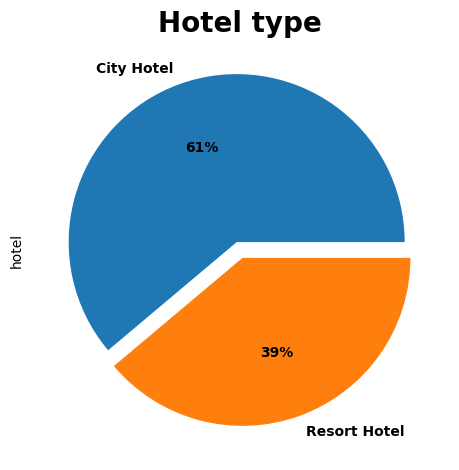

In [52]:
hotel_typ =hotel_df['hotel'].value_counts()
hotel_typ

plt.subplot(2,2,1 )
hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,12),explode =[0.05]*2) 
plt.title('Hotel type',fontweight="bold", size=20)

Text(0.5, 1.0, '% Revenue on each hotel')

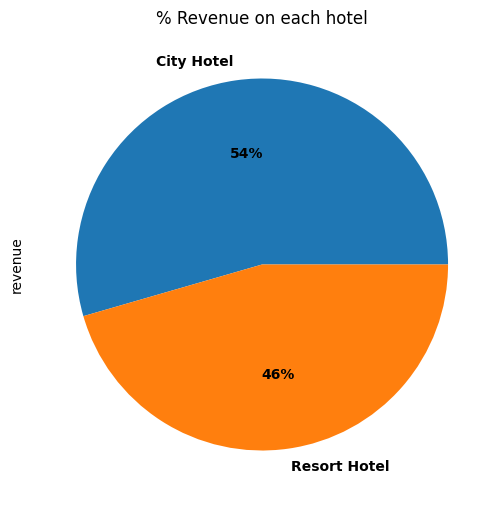

In [60]:
#Now, we will check overall revenue hotel wise
hotel_wise_revenue =  hotel_df.groupby('hotel')['revenue'].sum()
hotel_wise_revenue

hotel_wise_revenue.plot.pie(autopct='%1.0f%%', textprops={'weight': 'bold'},figsize =(6,9))
plt.title('% Revenue on each hotel')

<Axes: xlabel='arrival_date_month'>

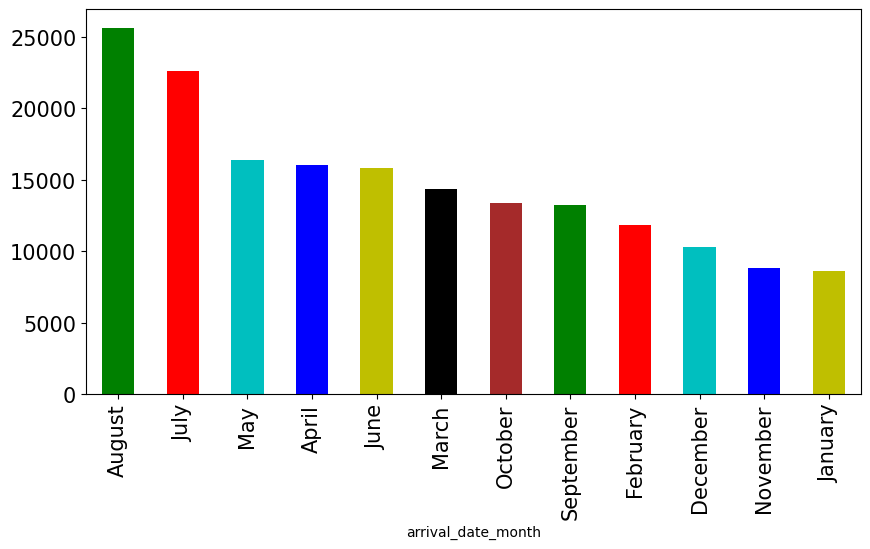

In [67]:
guest_month_wise = pd.DataFrame(hotel_df[['arrival_date_month', 'total_guest']])
guest_month_wise
guest_month_wise_df = guest_month_wise.groupby('arrival_date_month')['total_guest'].sum()
guest_month_wise_df.sort_values(ascending=False, inplace= True)

#visual representation 
plt.figure(figsize=(10,5))
guest_month_wise_df.plot(kind='bar', color=['g', 'r', 'c', 'b', 'y', 'black', 'brown'], fontsize=15)

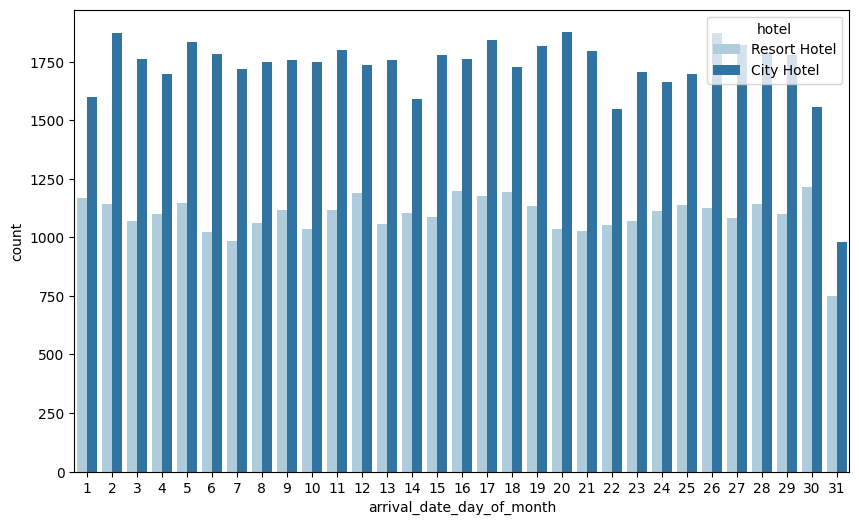

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(data = hotel_df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

# Chart 3


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  object 
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

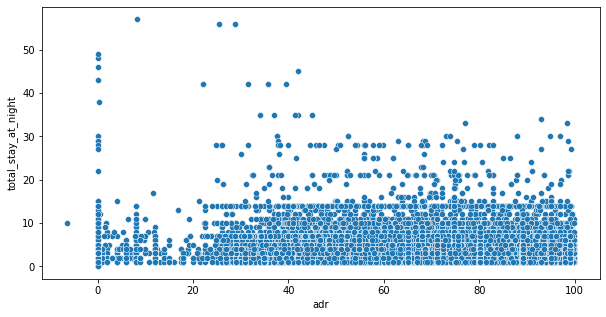

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = 'total_stay_at_night', x= 'adr', data= hotel_df[hotel_df['adr']<100])
plt.show()

# Chart 4

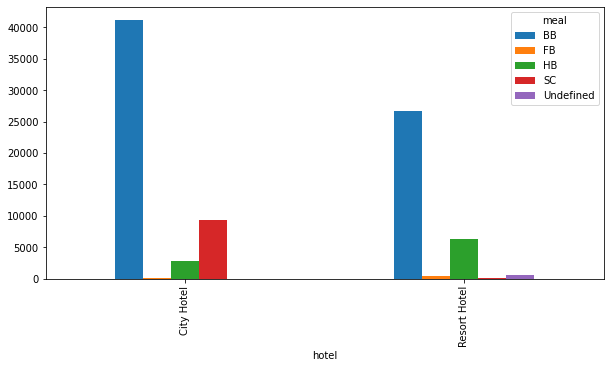

In [ ]:
hotel_wise_meal = hotel_df.groupby(['hotel','meal'])['meal'].count().unstack()
hotel_wise_meal.plot(kind='bar', figsize = (10,5))

# Chart 5


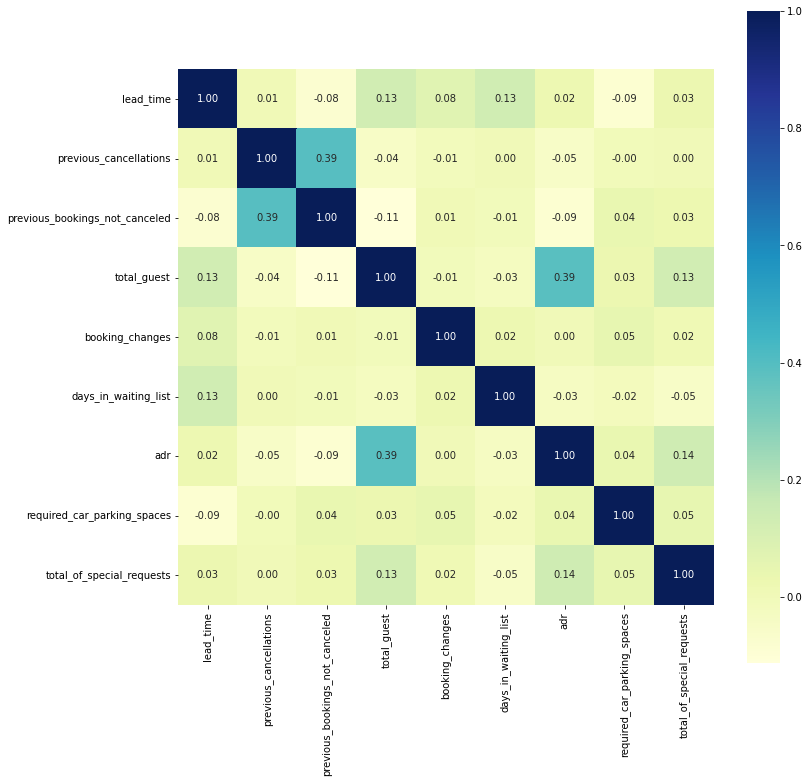

In [ ]:
## Correlation Heatmap visualization code
corr_df = hotel_df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_df , annot= True , fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True, cmap="YlGnBu")

#Some Straight Forward Questions 

 Which is the most common channel for booking hotels?

In [ ]:
hotel_df.shape[0]

87396

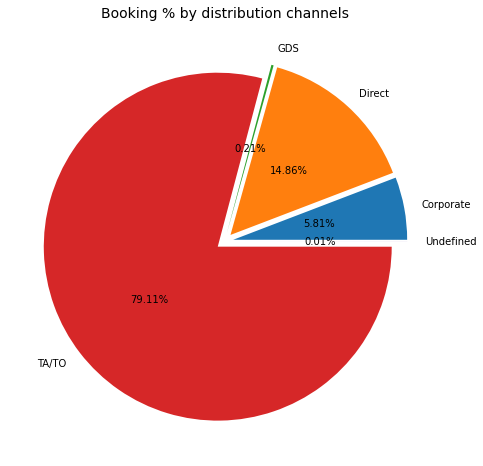

In [ ]:
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

 Which meal type is most preffered meal of customers?

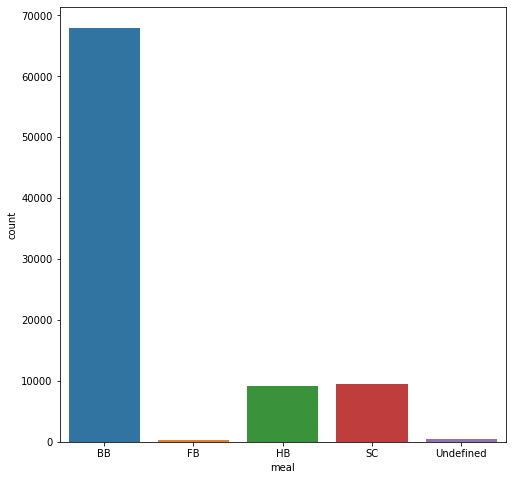

In [ ]:
plt.figure(figsize = (8,8 ))
sns.countplot(x= hotel_df['meal'])
plt.show()

Which hotel has higher bookings cancellation rate ? 

In [ ]:
hotel_df.info()

In [ ]:
cancelled_data = hotel_df[hotel_df['is_canceled']=='is canceled']
cancel_group = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_group.size()).rename(columns = {0:'total_cancelled_bookings'})

#group by hotel 
groupby_hotel = hotel_df.groupby('hotel')
D2 = pd.DataFrame(groupby_hotel.size()).rename(columns = {0: 'total_bookings'})

D3 = pd.concat([D1,D2], axis=1)

#calculating Percentage 
D3['% Cancellation'] = round(D3['total_cancelled_bookings'] / D3['total_bookings']*100, 2)
D3

,total_cancelled_bookings,total_bookings,% Cancellation
hotel,,,
City Hotel,16049,53428,30.04
Resort Hotel,7976,33968,23.48


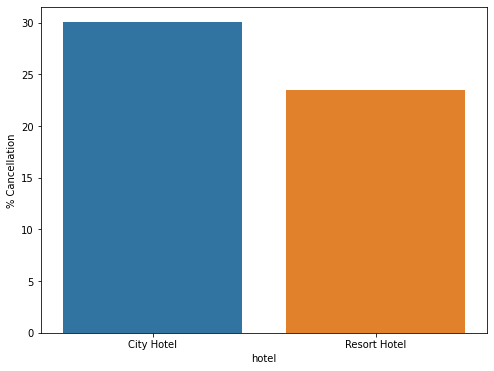

In [ ]:
#Graphical Representation 
plt.figure(figsize=(8,6))
sns.barplot(x = D3.index, y = D3['% Cancellation'])


Which distribution channel brings better revenue generating deals for hotels?

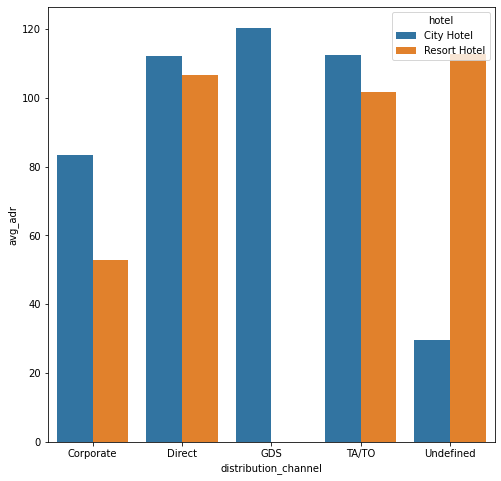

In [ ]:
groupby_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
d1 = pd.DataFrame(round((groupby_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize=(8,8))
sns.barplot(x = d1['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.show()

 which month results in high revenue? 

In [ ]:
data_resort = hotel_df[(hotel_df['hotel']=='Resort Hotel') & (hotel_df['is_canceled']== 'not canceled')]
data_city= hotel_df[(hotel_df['hotel']=='City Hotel') & (hotel_df['is_canceled']== 'not canceled')]


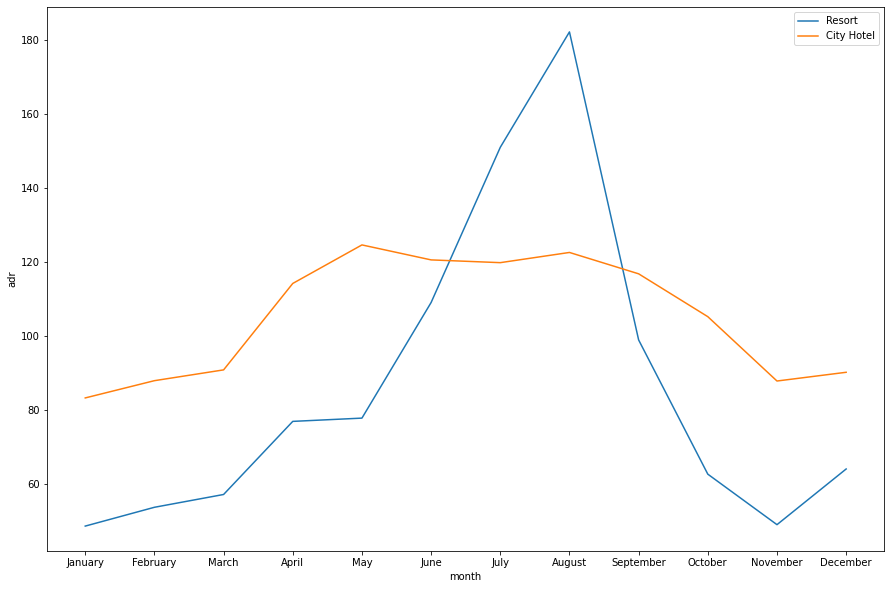

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

Deposits vs cancellation rate  , cancellation on type of hotel 